In [26]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import cv2
import numpy as np

if torch.cuda.is_available():
    device = 'cuda:0'
    print('Running on GPU')
else:
    device = 'cpu'
    print('Running on CPU')
    
from models_and_functions import Generator, Discriminator, get_noise

Running on GPU


In [11]:
gen = torch.load('generator.pth')
gen.to(device)

Generator(
  (gen): Sequential(
    (0): Sequential(
      (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1))
      (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (2): Sequential(
      (0): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (3): Sequential(
      (0): ConvTranspose2d(256, 128, kernel_size=(2, 2), stride=(2, 2))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (4): Sequential(
      (0): ConvTranspose2d(128, 3, kernel_size=(2, 2), strid

In [89]:
from torchvision.utils import make_grid

def show_tensor_images(image_tensor, num_images=25, size=(3, 64, 64)):
    '''
    Function for visualizing images: Given a tensor of images, number of images, and
    size per image, plots and prints the images in an uniform grid.
    '''
    image_tensor = (image_tensor + 1) / 2
    image_unflat = image_tensor.detach().cpu()
    image_grid = make_grid(image_unflat[:num_images], nrow=5)
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())
    plt.show()

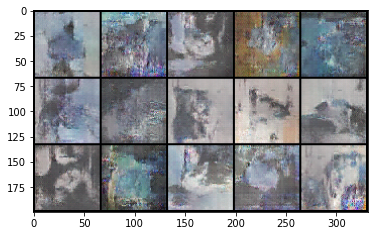

In [90]:
with torch.no_grad():
    fake_noise = get_noise(n_samples=15, noise_chan=100)
    
    fake_images = gen(fake_noise)
    
    show_tensor_images(fake_images)